In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import warnings
warnings.simplefilter("ignore", UserWarning)

In [144]:
dataset = pd.read_csv(r'C:\Users\80667\Desktop\文件\ИУ5\研一下\MMO\lab\lab3\DOGE-USD.csv')

In [145]:
dataset.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


In [146]:
X=dataset.drop('Date',axis=1)
y=dataset['Date']

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [148]:
X_train=X_train.drop(['Close'],axis=1)
X_test=X_test.drop(['Close'],axis=1)
X_train

,Open,High,Low,Adj Close,Volume
1451,0.004996,0.005442,0.004996,0.005307,3.761870e+07
327,0.000162,0.000164,0.000158,0.000160,6.811200e+04
2246,0.002670,0.002851,0.002655,0.002753,3.963317e+07
2078,0.002539,0.002542,0.002472,0.002486,1.854860e+08
1925,0.002072,0.002098,0.002036,0.002088,7.920726e+07
...,...,...,...,...,...
987,0.002639,0.002739,0.002392,0.002657,1.984060e+07
2435,0.486954,0.515599,0.470384,0.476115,4.802903e+09
1541,0.002178,0.002227,0.002097,0.002097,2.476615e+07
1429,0.002299,0.002370,0.002227,0.002292,5.860370e+06


# Масштабирование признаков
## Методом Z-оценки:

In [149]:
def arr_df(a):
    df = pd.DataFrame(a, columns=X_train.columns)
    return df
scaler1 = StandardScaler()
scaled_X_1 = arr_df(scaler1.fit_transform(X_train))
scaled_X_1

,Open,High,Low,Adj Close,Volume
0,-0.251367,-0.247675,-0.250504,-0.248698,-0.178626
1,-0.310505,-0.306672,-0.315604,-0.311549,-0.190154
2,-0.279823,-0.276637,-0.282004,-0.279885,-0.178007
3,-0.281425,-0.280091,-0.284467,-0.283146,-0.133229
4,-0.287138,-0.285054,-0.290334,-0.288006,-0.165858
...,...,...,...,...,...
1938,-0.280202,-0.277889,-0.285543,-0.281058,-0.184084
1939,5.644766,5.454805,6.011784,5.500394,1.284369
1940,-0.285842,-0.283612,-0.289513,-0.287896,-0.182572
1941,-0.284361,-0.282014,-0.287764,-0.285515,-0.188376


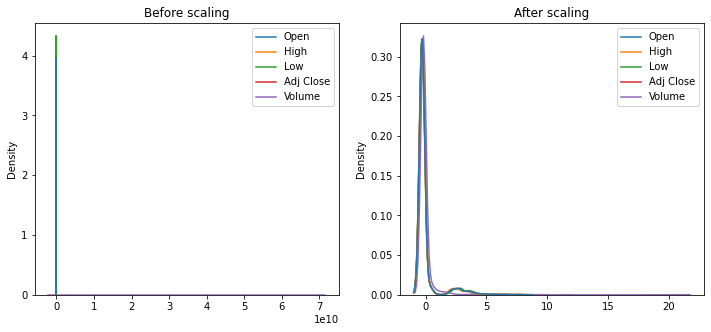

In [150]:
def data_visualize(columns, df1, df2, label1, label2):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  ax1.set_title(label1)
  sns.kdeplot(data=df1[columns], ax=ax1)
  ax2.set_title(label2)
  sns.kdeplot(data=df2[columns], ax=ax2)
  plt.show()

data_visualize(X_train.columns, X_train, scaled_X_1, 'Before scaling', 'After scaling')

## Методом MinMaxScaler:

In [151]:
scaler2 = MinMaxScaler()
scaled_X_2 = arr_df(scaler2.fit_transform(X_train))
scaled_X_2

,Open,High,Low,Adj Close,Volume
0,0.007138,0.007259,0.008076,0.007624,5.417324e-04
1,0.000109,0.000102,0.000120,0.000107,7.407651e-07
2,0.003756,0.003745,0.004226,0.003894,5.707549e-04
3,0.003565,0.003326,0.003925,0.003504,2.672057e-03
4,0.002886,0.002724,0.003208,0.002922,1.140899e-03
...,...,...,...,...,...
1938,0.003711,0.003593,0.003794,0.003754,2.856032e-04
1939,0.707950,0.699017,0.773413,0.695246,6.919522e-02
1940,0.003041,0.002899,0.003309,0.002936,3.565656e-04
1941,0.003216,0.003093,0.003523,0.003220,8.418987e-05


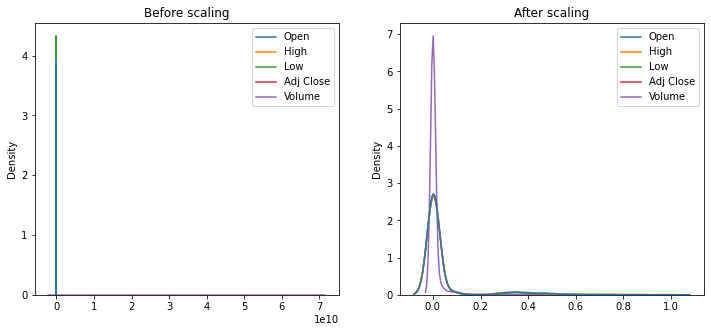

In [152]:
data_visualize(X_train.columns, X_train, scaled_X_2, 'Before scaling', 'After scaling')

## Методом RobustScaler:

In [153]:
scaler3 = RobustScaler()
scaled_X_3 = arr_df(scaler3.fit_transform(X_train))
scaled_X_3

,Open,High,Low,Adj Close,Volume
0,0.921463,1.004247,0.982861,1.023450,0.342109
1,-0.663715,-0.656024,-0.659087,-0.664644,-0.177702
2,0.158715,0.189210,0.188359,0.185799,0.369995
3,0.115757,0.092010,0.126251,0.098229,2.389026
4,-0.037383,-0.047656,-0.021721,-0.032306,0.917816
...,...,...,...,...,...
1938,0.148549,0.153979,0.099101,0.154313,0.096008
1939,158.966388,161.481441,158.928899,155.437357,66.307628
1940,-0.002623,-0.007078,-0.001018,-0.029354,0.164192
1941,0.037055,0.037905,0.043102,0.034602,-0.097520


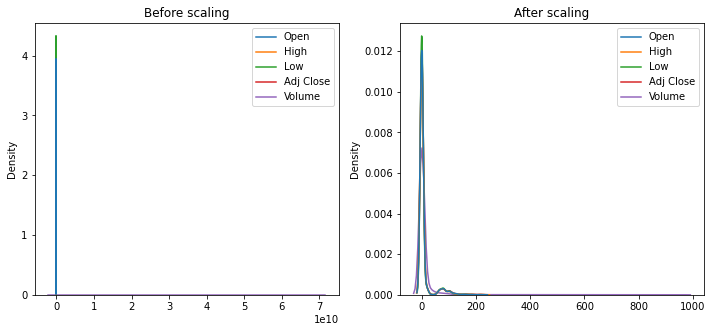

In [154]:
data_visualize(X_train.columns, X_train, scaled_X_3, 'Before scaling', 'After scaling')

# Обработка выбросов для числовых признаков

## Удаление выборсов

In [155]:
def plot_for_analys(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,7))
    plt.subplot(1, 2, 1)
    sns.violinplot(x=df[variable])    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [156]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

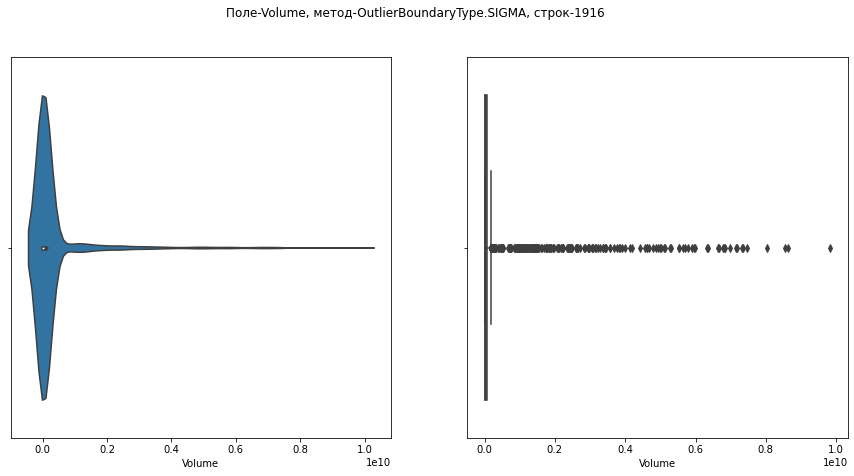

In [157]:
x_col_list = ['Volume']
data=X_train
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        plot_for_analys(data_trimmed, col, title)

## Замена выбросов

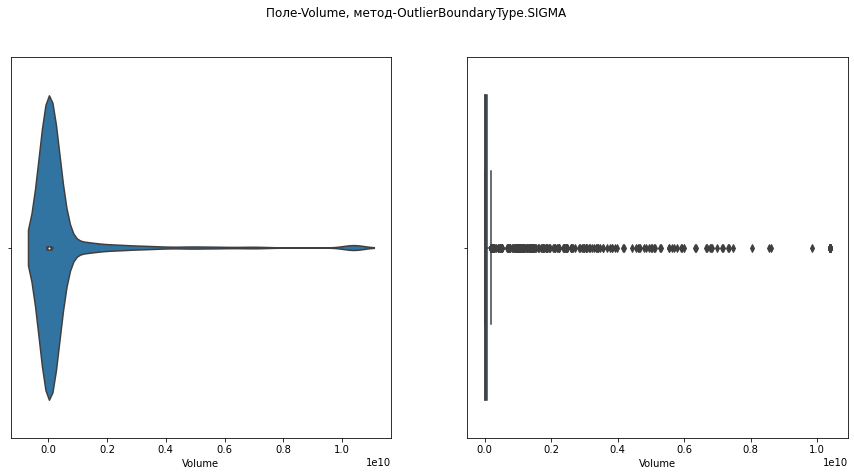

In [158]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        plot_for_analys(data, col, title)

# Обработка по крайней мере одного нестандартного признака

In [111]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


In [112]:
dataset['Date'] = dataset.apply(lambda x: pd.to_datetime(x['Date'], format='%Y-%m-%d'), axis=1)

In [113]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


In [114]:
dataset['now'] = datetime.datetime.today()
dataset['diff'] = dataset['now'] - dataset['Date']
dataset.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume               float64
now           datetime64[ns]
diff         timedelta64[ns]
dtype: object

In [115]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,now,diff
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0,2022-06-06 02:22:24.269973,2819 days 02:22:24.269973
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0,2022-06-06 02:22:24.269973,2818 days 02:22:24.269973
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0,2022-06-06 02:22:24.269973,2817 days 02:22:24.269973
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0,2022-06-06 02:22:24.269973,2816 days 02:22:24.269973
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0,2022-06-06 02:22:24.269973,2815 days 02:22:24.269973


# Отбор признаков из группы методов фильтрации (корреляция признаков)

<AxesSubplot:>

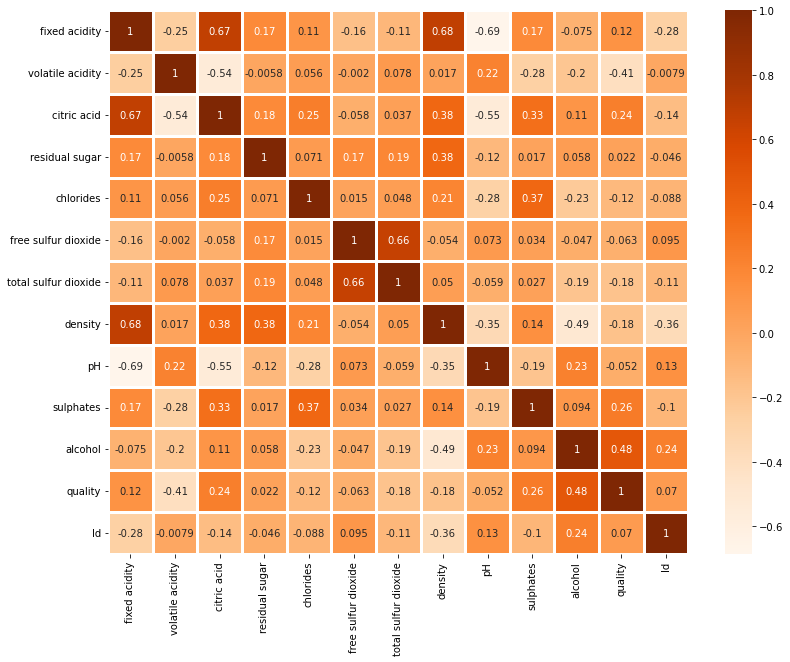

In [128]:
data_dir2 = r'C:\Users\80667\Desktop\文件\ИУ5\研一下\MMO\数据集\葡萄酒质量数据集\WineQt.csv'
data=pd.read_csv(data_dir2)
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap="Oranges", annot=True, linewidths=3)

In [130]:
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.53]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [131]:
make_corr_df(data)

,f1,f2,corr
0,pH,fixed acidity,0.685163
1,fixed acidity,pH,0.685163
2,density,fixed acidity,0.681501
3,fixed acidity,density,0.681501
4,citric acid,fixed acidity,0.673157
5,fixed acidity,citric acid,0.673157
6,free sulfur dioxide,total sulfur dioxide,0.661093
7,total sulfur dioxide,free sulfur dioxide,0.661093
8,pH,citric acid,0.546339
9,citric acid,pH,0.546339


In [132]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [133]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['fixed acidity', 'citric acid', 'pH'],
 ['fixed acidity', 'density'],
 ['total sulfur dioxide', 'free sulfur dioxide'],
 ['citric acid', 'volatile acidity']]

In [134]:
data=data.drop(['fixed acidity','citric acid'],axis=1)
data.head()

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.70,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,0.88,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,0.76,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,0.28,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,0.70,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Отбор признаков из группы методов обертывания (алгоритм полного перебора)

In [135]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [141]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
data=pd.read_csv(data_dir2)
X=data[['total sulfur dioxide','chlorides','residual sugar','quality','alcohol','free sulfur dioxide']]
y=data[['pH']]
X_train,X_test,y_train,y_test=train_test_split(X,y)
knn = KNeighborsClassifier(n_neighbors=3)
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train, custom_feature_names=X.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ZL\Work\Anaconda\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ZL\Work\Anaconda\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 200, in fit
    return self._fit(X, y)
  File "C:\ZL\Work\Anaconda\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 429, in _fit
    check_classification_targets(y)
  File "C:\ZL\Work\Anaconda\Anaconda\lib\site-packages\sklearn\utils\multiclass.py", line 200, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


# Отбор признаков из группы методов вложения (линейная регрессия)

In [137]:
from sklearn.linear_model import Lasso
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X_train, y_train)
# Коэффициенты регрессии
list(zip(X_train.columns, e_ls1.coef_))

[('volatile acidity', 0.0),
 ('residual sugar', -0.0),
 ('chlorides', -0.0),
 ('free sulfur dioxide', 0.0),
 ('total sulfur dioxide', -0.0),
 ('density', -0.0)]

In [138]:
from sklearn.feature_selection import SelectFromModel
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X_train, y_train)
list(zip(X_train.columns, sel_e_ls1.get_support()))

[('volatile acidity', False),
 ('residual sugar', False),
 ('chlorides', False),
 ('free sulfur dioxide', False),
 ('total sulfur dioxide', False),
 ('density', False)]